In [3]:
import pickle

import numpy as np

In [4]:
from nn_labs.nn.network import NetworkV2
from nn_labs.nn.layers import Conv2D, DenseLayer, Flatten, MaxPool2D
from nn_labs.nn.activation_functions import ReLU, Sigmoid

bob_net = NetworkV2()

bob_net.add_layer(Conv2D(1, 3, 16, 1))
bob_net.add_layer(MaxPool2D(2, 2))
bob_net.add_layer(Conv2D(16, 3, 16, 1))
bob_net.add_layer(MaxPool2D(2, 2))
bob_net.add_layer(Flatten())
bob_net.add_layer(DenseLayer(256, 400))
bob_net.add_layer(ReLU())
bob_net.add_layer(DenseLayer(400, 784))
bob_net.add_layer(Sigmoid())

In [19]:
from pathlib import Path
from nn_labs.nn.perf import MSELoss
from nn_labs.image_net.load import load_fashion_mnist
from nn_labs.nn.optimizers import PhilipOptimizer2
import wandb

(X_train, Y_train), (X_test, Y_test) = load_fashion_mnist()

X_train = X_train.reshape(-1, 1, 28, 28)[:4086 * 2]
X_test = X_test.reshape(-1, 1, 28, 28)[:4086 * 2]

EPOCHS = 100
BATCH_SIZE = 4086
LEARNING_RATE = 10e-4
batch_count = X_train.shape[0] // BATCH_SIZE
opt = PhilipOptimizer2(bob_net, learning_rate=LEARNING_RATE)
OUTPUT_DIR = Path("/Users/philip/code/uni/nn/nn_labs/image_net/conv_models") / "models"

loss_fn = MSELoss()

wandb_run = wandb.init(
    project="fashion-mnist-autoencoder-conv",
    config={
        "learning_rate": LEARNING_RATE,
        "dataset": "Fashion mnist",
        "epochs": EPOCHS,
        "batch_size": BATCH_SIZE,
    },
)


for epoch in range(EPOCHS):
    print(f"Epoch: {epoch}")
    for batch_no in range(batch_count):
        start_idx = batch_no * BATCH_SIZE
        end_idx = start_idx + BATCH_SIZE

        x = X_train[start_idx:end_idx]
        y = Y_train[start_idx:end_idx]
        
        x_cmp = x.reshape(BATCH_SIZE, 784)
        
        prediction = bob_net.forward(x)
        loss = loss_fn.calculate(prediction, x_cmp)
        
        loss_fn.backward(prediction, x_cmp)
        bob_net.backward(loss_fn.d_inputs)
        
        if not batch_no % 100:
            wandb.log({"loss": loss, "epoch": epoch})
        
        opt.step()

bob_net.save(str(OUTPUT_DIR / wandb_run.name))
wandb_run.finish()



Epoch: 0


ValueError: shapes (4086,64) and (256,400) not aligned: 64 (dim 1) != 256 (dim 0)

In [6]:
import pickle
from nn_labs.image_net.load import load_fashion_mnist

test_net: NetworkV2 = pickle.load(open("/Users/philip/code/uni/nn/nn_labs/image_net/conv_models/models/pretty-cloud-6", "rb"))

(X_train, Y_train), (X_test, Y_test) = load_fashion_mnist()

X_train = X_train.reshape(-1, 1, 28, 28)[:4086 * 2]
X_test = X_test.reshape(-1, 1, 28, 28)[:4086 * 2]


In [9]:
out = test_net.forward(X_train)
out = out.reshape(-1, 28, 28) * 255

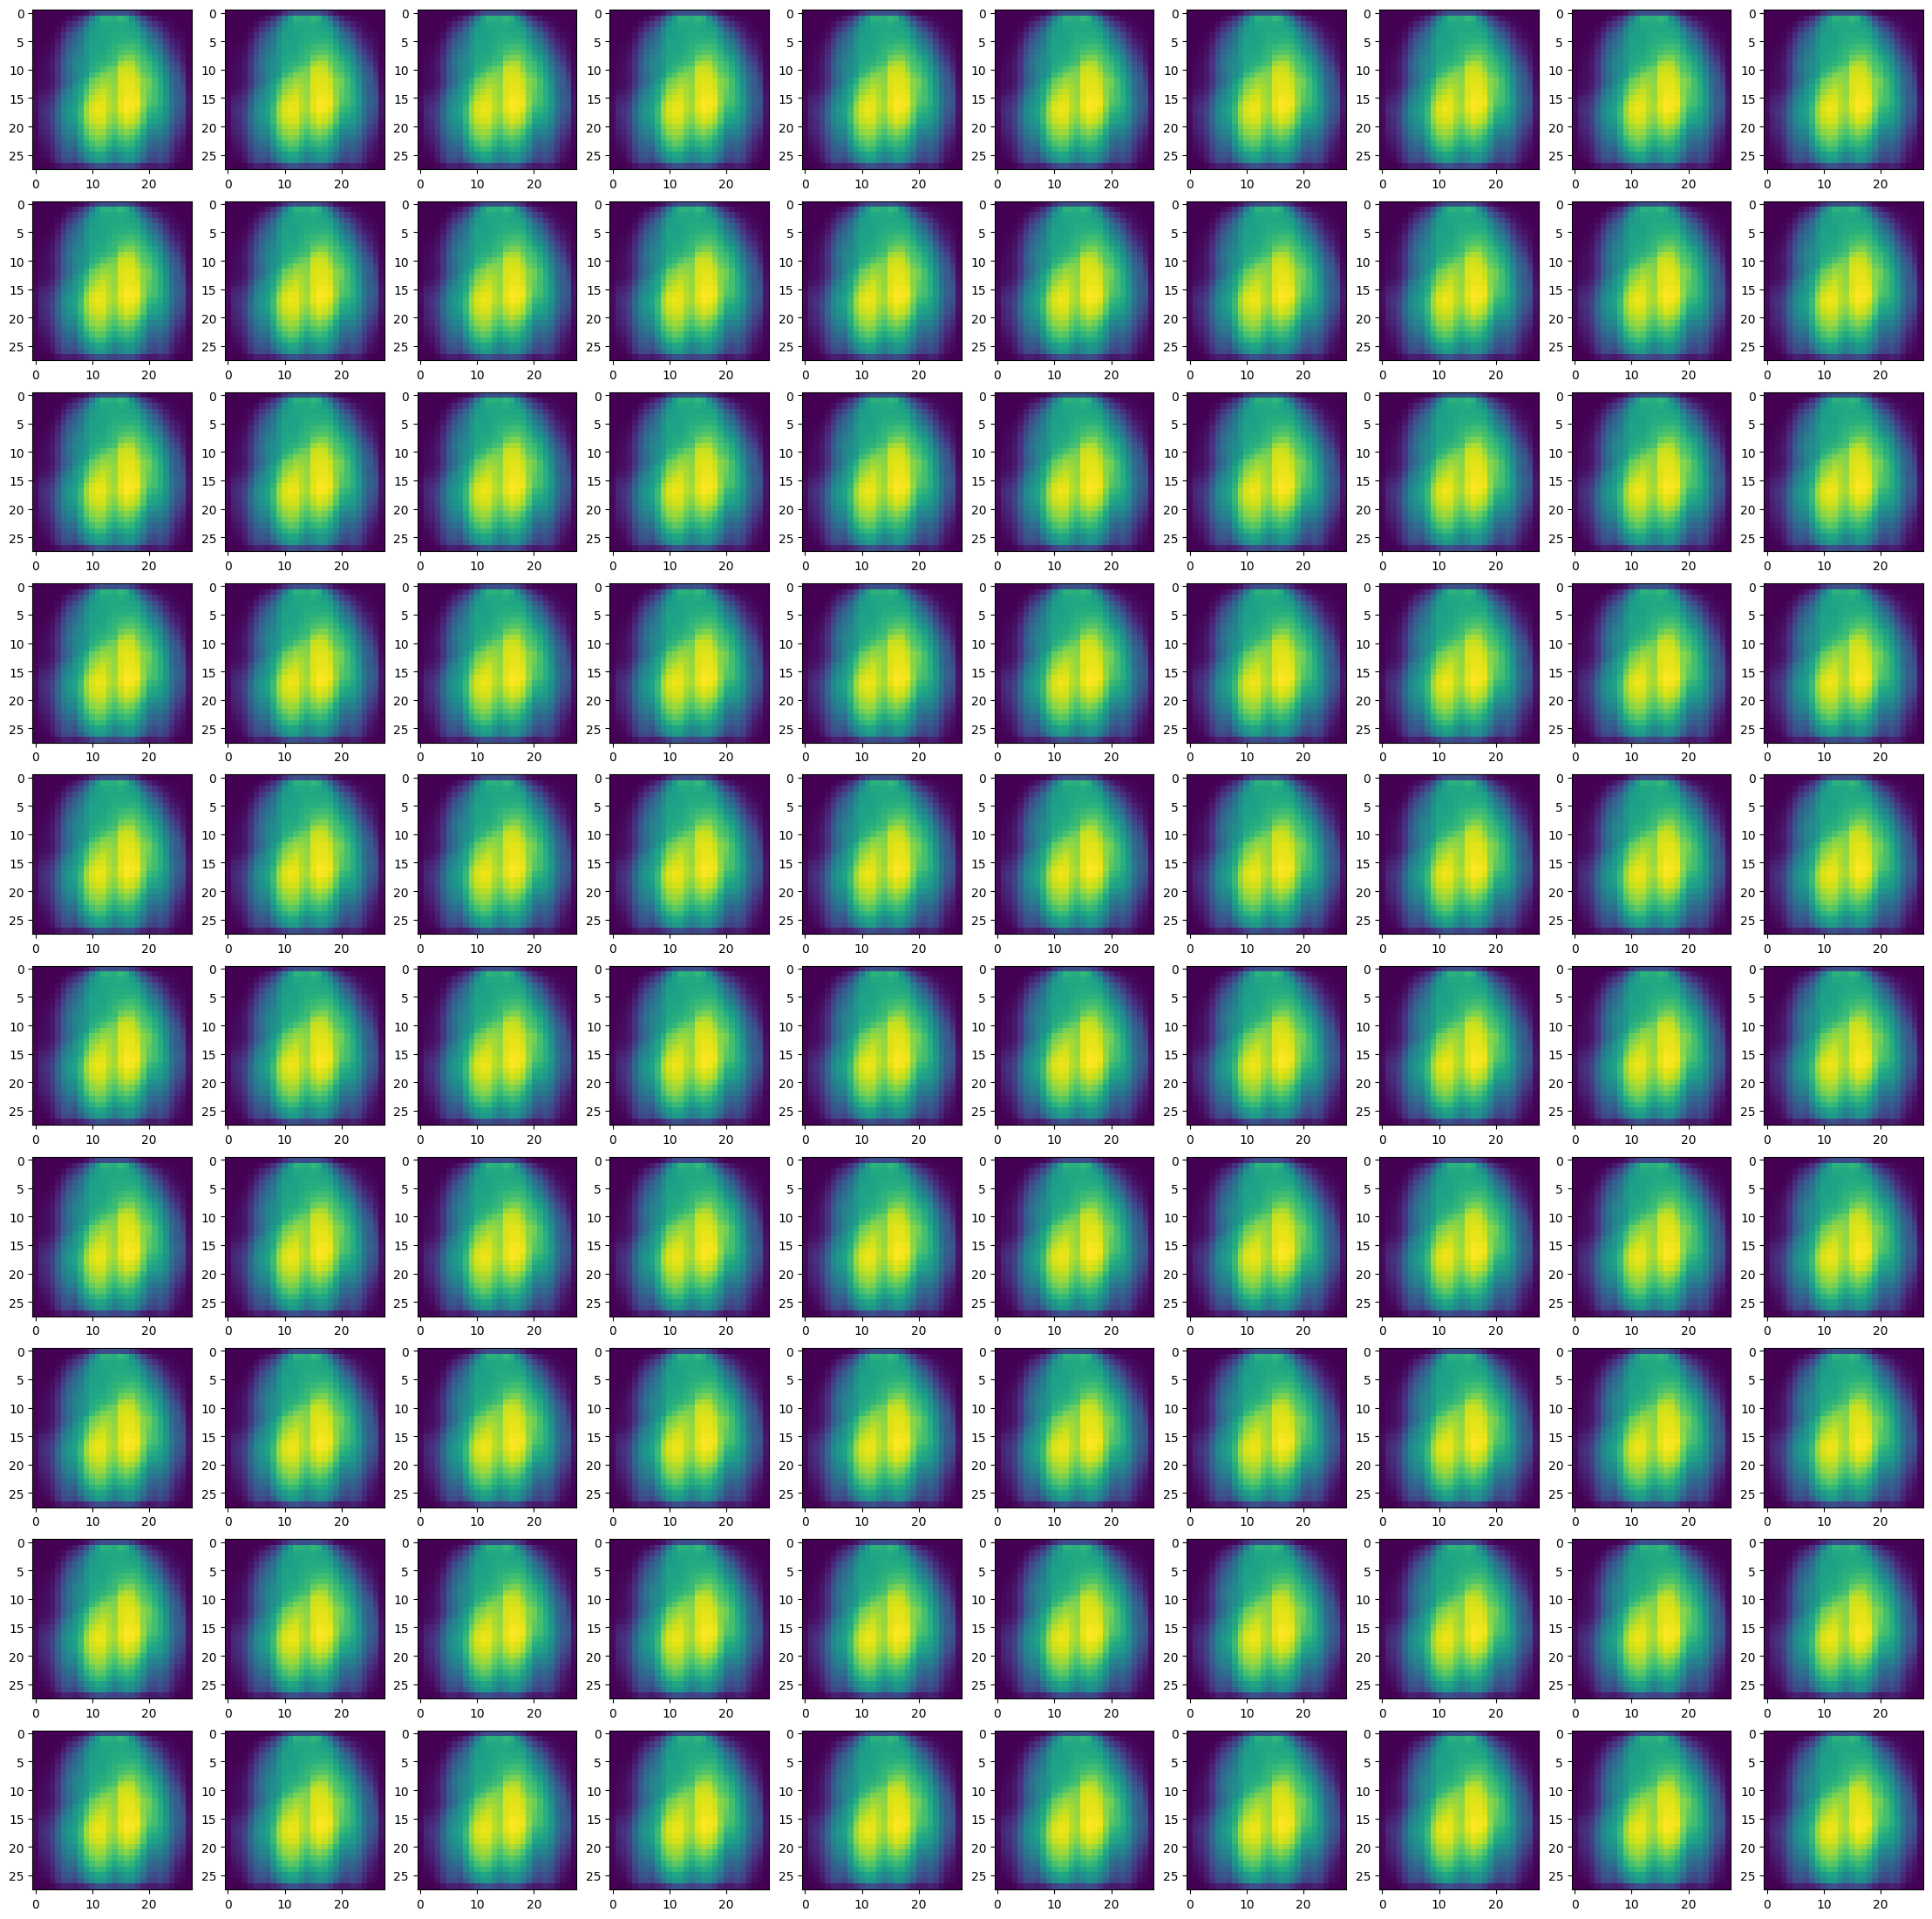

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(28,28))

for i,ax in enumerate(axes.flat):
    ax.imshow(out[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 8 is out of bounds for axis 0 with size 8

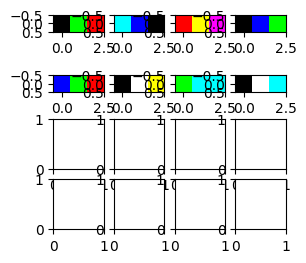

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,4, figsize=(3,3))

for i,ax in enumerate(axes.flat):
    ax.imshow(test_net.layers[0].kernel[i] * 255)